In [202]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import preprocessing 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import sys

In [203]:
#import data set
data = load_boston()

In [204]:
boston_data = pd.DataFrame(data.data)


In [205]:
boston_data.describe() # no missing values

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [206]:
boston_data.columns = data.feature_names
boston_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [207]:
boston_data['price'] = data.target
boston_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [208]:
reg = linear_model.LinearRegression()
features = [col for col in boston_data.columns if not col == 'price' ]
features

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [209]:
reg.fit(boston_data[features],boston_data.price)

LinearRegression()

In [210]:
reg.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [211]:
reg.intercept_

36.45948838508978

In [212]:
# get r^2 score for the model
r2_score(boston_data.price,reg.predict(boston_data[features]))

0.7406426641094095

In [213]:
# Get a summary of the model using OLS from statsmodels
std_scaler = preprocessing.StandardScaler()
X = boston_data[features].to_numpy()
X = std_scaler.fit_transform(X)
X  = sm.add_constant(X)
y = boston_data.price
model = sm.OLS(y,X)
results=model.fit()


In [214]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 31 Aug 2021   Prob (F-statistic):          6.72e-135
Time:                        06:26:30   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.211    106.814      0.000      22.118      22.947
x1            -0.9281      0.282     -3.287      0.001      -1.483      -0.373
x2             1.0816      0.320      3.382      0.001       0.453       1.710
x3             0.1409      0.421      0.334      0.738      -0.687       0.969
x4             0.6817      0.219      3.118      0.002       0.252       1.111
x5            -2.0567      0.442     -4.651      0.000      -2.926      -1.188
x6             2.6742      0.293      9.116      0.000       2.098       3.251
x7             0.0195      0.371      0.052      0.958      -0.710       0.749
x8            -3.1040      0.420     -7.398      0.000      -3.928      -2.280
x9             2.6622      0.577      4.613      0.000       1.528       3.796
x10           -2.0768      0.633     -3.280      0.001      -3.321      -0.833
x11           -2.0606      0.283     -7.283      0.000      -2.617      -1.505
x12            0.8493      0.245      3.467      0.001       0.368       1.331
x13           -3.7436      0.362    -10.347      0.000      -4.454      -3.033
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                         9.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## personal class representing multiple linear regression


In [215]:
class MultipleLinearRegression:
    def __init__(self,X,y):
        self.X = X
        self.y = y
        self.n = np.size(self.y)
        self.beta = self.normalEq()
        self.y_mean = (sum(y)/self.n)*np.ones(np.shape(self.y))
        
    def normalEq (self):
        return (np.linalg.inv(self.X.T@self.X)@self.X.T@self.y)
    def getbeta (self):
        return self.beta
    def predict (self,X,b):
        return X@self.beta
    def getSSR (self,b):
        return (self.predict(self.X,b)-self.y_mean).T@(self.predict(self.X,b)-self.y_mean)
    def getSST (self):
        return (self.y-self.y_mean).T@(self.y-self.y_mean)
    def getRSquared (self,b):
        return self.getSSR(b)/self.getSST()
   

In [216]:
my_model = MultipleLinearRegression(X,y)

array([[ 1.        , -0.41978194,  0.28482986, ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [ 1.        , -0.41733926, -0.48772236, ..., -0.30309415,
         0.44105193, -0.49243937],
       [ 1.        , -0.41734159, -0.48772236, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [ 1.        , -0.41344658, -0.48772236, ...,  1.17646583,
         0.44105193, -0.98304761],
       [ 1.        , -0.40776407, -0.48772236, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [ 1.        , -0.41500016, -0.48772236, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [38]:
my_model.getRSquared(my_model.beta)


0.7406426641094074

## gradient descent function

In [39]:
def gradient_descent(X,y,learning_rate=0.05,num_iter = 1000):
   
    (n,p) = np.shape(X)
    beta = np.random.uniform(-10.0, 10.0, p)
    
    
    for i in range (num_iter):
         errors = np.subtract(X.dot(beta),y)
         subt = (learning_rate/n)*(X.T.dot(errors))
         beta -= subt
         
    return beta    

In [40]:
estimated_beta=gradient_descent(X,y)
estimated_beta

array([ 2.25328063e+01, -9.19064548e-01,  1.06569667e+00,  9.16985002e-02,
        6.88750681e-01, -2.04723803e+00,  2.68326732e+00,  1.17351672e-02,
       -3.10715866e+00,  2.53835571e+00, -1.93635079e+00, -2.05578240e+00,
        8.48435884e-01, -3.73885380e+00])

In [41]:
n = np.size(y)
y_mean = (sum(y)/n)*np.ones(np.shape(y))
def predict (X,beta):
        return X@beta
def getSSR (X,y,beta):
        return (predict(X,beta)-y_mean).T@(predict(X,beta)-y_mean)
def getSST (X,y,beta):
        return (y-y_mean).T@(y-y_mean)
def getRSquared (X,y,beta):
        return getSSR(X,y,beta)/getSST(X,y,beta)

In [42]:
getRSquared(X,y,estimated_beta)

0.7396643609205459

In [43]:
def cost(X, Y, beta):
  return ((Y - (X @ beta))**2).mean()

## standralization of X and calc R^2 using beta estimated from gradient descent

In [44]:

getRSquared(X,y,estimated_beta)

0.7396643609205459

## Plot learning Curves of Model

In [182]:
def plot_learning_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
        
    train_errors , val_errors = [],[]
    for i in range (1,len(X_train)):
        model.fit(X_train[:i],y_train[:i])
        y_train_predict= model.predict(X_train[:i])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:i],y_train_predict))
        val_errors.append(mean_squared_error(y_test,y_test_predict))
    plt.plot(np.sqrt(train_errors),  label = 'train')
    plt.plot(np.sqrt(val_errors), label = "test")

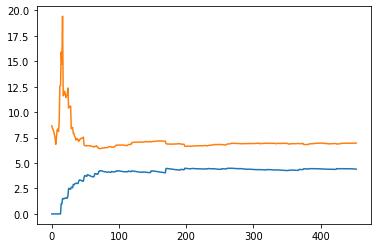

In [183]:
plot_learning_curves(reg,X,y)

## use cross validation to tune lambda parameter for ridge regression

In [194]:
def get_alpha (X,y):
    cv = KFold(n_splits= 10)
    parameters = np.arange(0,200,0.1)
    alpha = 0
    max_score = sys.maxsize*-1
    for par in parameters:
        ridge = linear_model.Ridge(alpha = par )
        tot_score = 0
        for X_train_idx,X_test_idx in cv.split(X):
            X_train = X[X_train_idx]
            y_train = y[X_train_idx]
            X_test =X[X_test_idx]
            y_test = y[X_test_idx]
            ridge.fit(X_train, y_train)
            tot_score += ridge.score(X_test,y_test)
         
        tot_score/=10
        
        
        if tot_score > max_score:
            alpha = par
            max_score = tot_score
    return alpha        

In [195]:
alpha = get_alpha(X,y)
alpha

112.30000000000001

In [196]:
ridge = linear_model.Ridge(alpha = alpha)
ridge.fit(X,y)
r2_score(y,ridge.predict(X))


0.7176655274113468

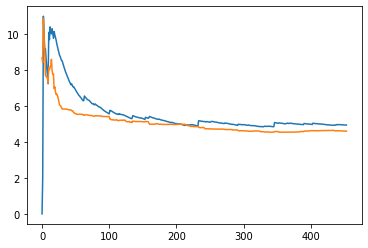

In [197]:
plot_learning_curves(ridge,X,y)